# Computational Social Science Project 3

##### **Group 1:**
+ Yael Nidam
+ Kelly Quinn
+ Monica De La Cruz

##### **Purpose of report**
1. Develop machine learning models to predict whether a business passes or fails a food inspection in Chicago, taking into consideration business information, previous inspection results, and neighborhood information.
2. Analyze the data to help city officials prioritize locations for food inspection audits.

##### **Data Sources**  
The City of Chicago's Open Data Portal food inspection data for 2011-2014.

##### **Overview**
1. Data cleaning and exploratory data analysis.
2. Data Pre-Processing and Cleaning.
3. Fit models.
4. Policy simulation.
5. Discussion.

## 1.Data cleaning and exploratory data analysis
This section was written by Aniket Kesari. It loads the libraries and the data, cleans the data, and conducts exploratory data analysis.

### 1.1 Load libraries and data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

#Added libraries
from sklearn import preprocessing #Adding package to help us normalize the data
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014.csv")

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

**What do inspections look like over time?**  
Inspection vary between days, weeks, and month. Overall there were more inspections in 2013 than in 2012, and on July of both years there were the smallest amount of inspections.

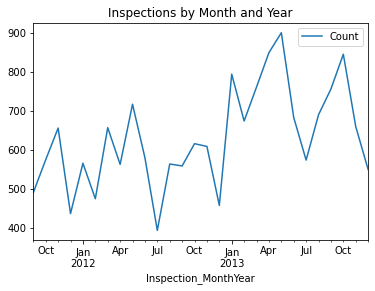

In [7]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

**What do the results look like?**   
There is an imbalance between the classes of the results, favoring 'pass' class.

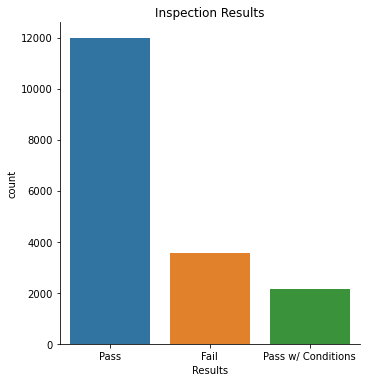

In [8]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

**What if we separate by facility type?**  
Overall Resturants seem to be more represented in all result categories.

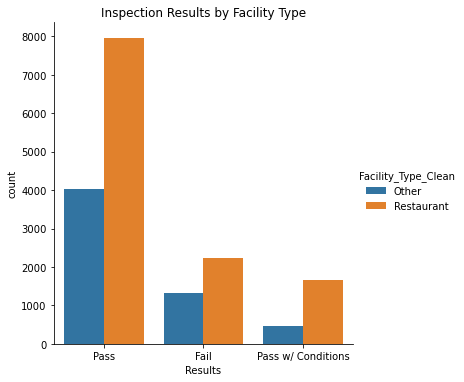

In [9]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

**Features that potentially predict the result perfectly**  
We examine 4 features that potentially predict the result perfectally and may cause overfitting. We conclude that 'seriouscount' should be excluded from the model because its outcome are too similar to the results.

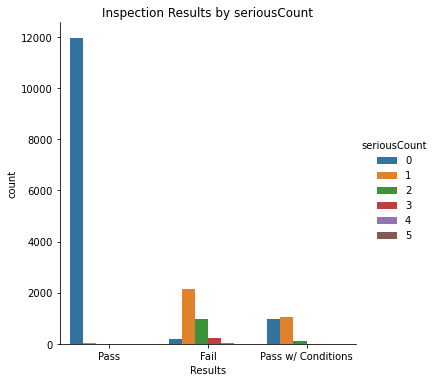

In [10]:
# Inspection Results by critical count
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'seriousCount')

plt.title("Inspection Results by seriousCount")
plt.show()

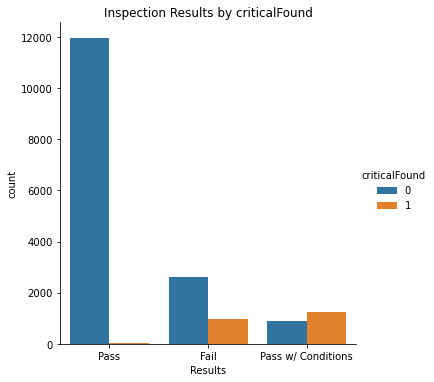

In [11]:
# Inspection Results by serious count
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'criticalFound')

plt.title("Inspection Results by criticalFound")
plt.show()

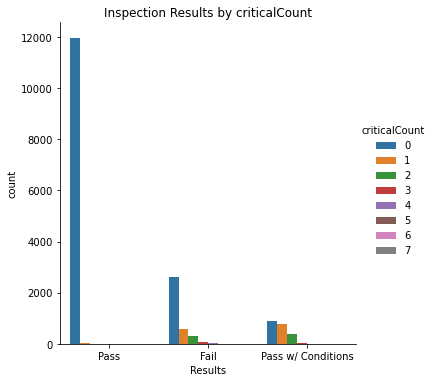

In [12]:
# Inspection Results by criticalCount
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'criticalCount')

plt.title("Inspection Results by criticalCount")
plt.show()

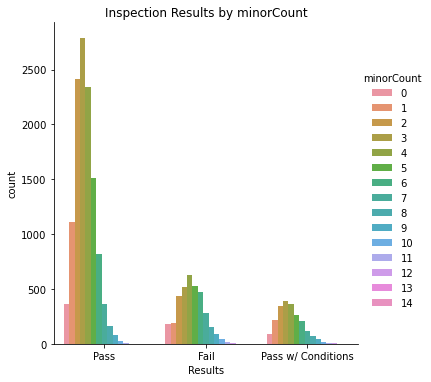

In [13]:
# Inspection Results by minorCount 
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'minorCount')

plt.title("Inspection Results by minorCount")
plt.show()

## 2. Preprocess Data

In [14]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

#Check that numeric values are not accidentaly recorded as objects.
#chicago_inspections_2011_to_2013.loc[:, chicago_inspections_2011_to_2013.dtypes == np.object].head(3)

#Check that there are no rows with null values
#print(chicago_inspections_2011_to_2013.isnull().sum().sum())

#correct datatype
chicago_inspections_2011_to_2013['POLICE_DISTRICT'] = chicago_inspections_2011_to_2013['POLICE_DISTRICT'].astype(object)

We use the describe function to see if we have categorial variables with too many unique values. We are interested in recoding these variables so that when we proceed to dumifying the data we wouldn't create too many new variables that capture very little information about our data set. We discover that there are 4 features with a large amount of unique values:

In [15]:
dat_describe = np.transpose(chicago_inspections_2011_to_2013.describe(include='all'))
dat_describe[dat_describe.unique>5]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Facility_Type,15311,168,Restaurant,11412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WARD_PRECINCT,15311,1792,42-9,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POLICE_DISTRICT,15311,23,1,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LICENSE_DESCRIPTION,15311,41,Retail Food Establishment,14307,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We decide to drop facility type and ward precinct because the information they contain is too granular. We keep police district as a proxy for ward precinct and liscence description as a proxy for facility type.

In [16]:
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop([
                                    #'Facility_Type_Clean', 
                                    'Facility_Type','WARD_PRECINCT','Inspection_Type'
                                   
                                #Features that are almost perfect predictors of the outcome
                                     ,'seriousCount'
                                    # ,'criticalFound','criticalCount' ,'minorCount'
                                     ],
                                      axis = 1)

In [17]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [18]:
#Scale data
X = pd.DataFrame(preprocessing.scale(X), columns = X.columns)

# Use a variance threshold of .8 to remove columns with no variance
selector = feature_selection.VarianceThreshold(0)
X = pd.DataFrame(selector.fit_transform(X), columns = X.columns)

X.head(3)

,criticalCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,POLICE_DISTRICT_1.0,POLICE_DISTRICT_2.0,POLICE_DISTRICT_3.0,POLICE_DISTRICT_4.0,POLICE_DISTRICT_5.0,POLICE_DISTRICT_6.0,POLICE_DISTRICT_7.0,POLICE_DISTRICT_8.0,POLICE_DISTRICT_9.0,POLICE_DISTRICT_10.0,POLICE_DISTRICT_11.0,POLICE_DISTRICT_12.0,POLICE_DISTRICT_14.0,POLICE_DISTRICT_15.0,POLICE_DISTRICT_16.0,POLICE_DISTRICT_17.0,POLICE_DISTRICT_18.0,POLICE_DISTRICT_19.0,POLICE_DISTRICT_20.0,POLICE_DISTRICT_22.0,POLICE_DISTRICT_24.0,POLICE_DISTRICT_25.0,POLICE_DISTRICT_81.0,LICENSE_DESCRIPTION_Assisted Living/Shared Housing Establishment,LICENSE_DESCRIPTION_Children's Services Facility License,LICENSE_DESCRIPTION_Consumption on Premises - Incidental Activity,LICENSE_DESCRIPTION_Day Care Center 2 - 6 Years,LICENSE_DESCRIPTION_Day Care Center Under 2 Years,LICENSE_DESCRIPTION_Day Care Center Under 2 and 2 - 6 Years,LICENSE_DESCRIPTION_Food - Shared Kitchen,LICENSE_DESCRIPTION_Food - Shared Kitchen - Supplemental,LICENSE_DESCRIPTION_Hazardous Materials,LICENSE_DESCRIPTION_Home Occupation,LICENSE_DESCRIPTION_Home Repair,LICENSE_DESCRIPTION_Hospital,LICENSE_DESCRIPTION_Hotel,LICENSE_DESCRIPTION_Late Hour,LICENSE_DESCRIPTION_Limited Business License,LICENSE_DESCRIPTION_Long-Term Care Facility,LICENSE_DESCRIPTION_Manufacturing Establishments,LICENSE_DESCRIPTION_Mobile Food License,LICENSE_DESCRIPTION_Motor Vehicle Repair : Engine Only (Class II),LICENSE_DESCRIPTION_Motor Vehicle Repair: Engine/Body(Class III),LICENSE_DESCRIPTION_Music and Dance,LICENSE_DESCRIPTION_Navy Pier Kiosk License,LICENSE_DESCRIPTION_Navy Pier Vendor (Food),LICENSE_DESCRIPTION_Not-For-Profit Club,LICENSE_DESCRIPTION_Outdoor Patio,LICENSE_DESCRIPTION_Package Goods,LICENSE_DESCRIPTION_Public Garage,LICENSE_DESCRIPTION_Public Place of Amusement,LICENSE_DESCRIPTION_Regulated Business License,LICENSE_DESCRIPTION_Residential Real Estate Developer,LICENSE_DESCRIPTION_Retail Food - Seasonal Lakefront Food Establishment,LICENSE_DESCRIPTION_Retail Food Est.-Supplemental License for Dog-Friendly Areas,LICENSE_DESCRIPTION_Retail Food Establishment,"LICENSE_DESCRIPTION_Scavenger, Private",LICENSE_DESCRIPTION_Shared Kitchen User,LICENSE_DESCRIPTION_Special Event Food,LICENSE_DESCRIPTION_Tavern,"LICENSE_DESCRIPTION_Tire Facilty Class I (100 - 1,000 Tires)",LICENSE_DESCRIPTION_Tobacco,LICENSE_DESCRIPTION_Wholesale Food Establishment,LICENSE_DESCRIPTION_Wrigley Field,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
0,-0.351081,-0.861411,-0.280933,-0.205945,-0.287986,-0.652463,0.712016,0.787426,1.156423,-0.356676,3.186141,-0.200197,-0.137475,-0.142566,3.659240,-0.168764,-0.130401,-0.112988,-0.113579,-0.093254,-0.043562,2.809639,-0.330793,0.914236,2.586097,0.369503,-0.150014,0.819983,-0.392181,-1.676768,-0.512807,4.179622,1.710820,-1.710820,-0.359578,-0.167326,-0.106276,-0.143517,-0.119059,-0.1224,-0.111496,-0.279849,-0.234799,-0.173015,-0.113284,-0.276442,-0.221165,-0.103088,-0.295292,-0.234179,-0.350246,2.991432,-0.195383,-0.172413,-0.203874,-0.213252,-0.01143,-0.008082,-0.013999,-0.032343,-0.133981,-0.074273,-0.099132,-0.016165,-0.013999,-0.0198,-0.016165,-0.0198,-0.044308,-0.008082,-0.016165,-0.091818,-0.084676,-0.028007,-0.008082,-0.013999,-0.013999,-0.01143,-0.01143,-0.008082,-0.016165,-0.01143,-0.03706,-0.016165,-0.013999,-0.032343,-0.016165,-0.01143,-0.008082,0.264906,-0.01143,-0.008082,-0.008082,-0.041243,-0.008082,-0.043562,-0.036166,-0.040441,-0.

Create training and validation sets

In [49]:
# Set seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .6, test_size=0.4,
                                                    random_state=13,stratify=y)


# Since our results are imbalanced, we use over and under sampling to avoid misleading results:
random_over_sampler = RandomOverSampler(sampling_strategy=0.9)
random_under_sampler = RandomUnderSampler(sampling_strategy=0.9)

X_train_over, y_train_over = random_over_sampler.fit_resample(X_train, y_train)
X_train_under, y_train_under = random_under_sampler.fit_resample(X_train, y_train)

## 3. Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [20]:
# We define a function to estimate the Root-Mean-Square-Deviation for all models.
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

### Model 1: Logistic Regression

In [21]:
logit_model = LogisticRegression(max_iter=10000)

#Define how to tune Hyperparameters
logit_param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': np.arange(.01, 0.1, .05),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'saga']}
logit_grid = GridSearchCV(logit_model, logit_param_grid, cv=3)

In [24]:
def logit_tune (X_train,y_train,X_validate,y_validate):
    
    # Train tuned model on training set
    logit = logit_grid.fit(X_train, y_train.ravel())
    best_index = np.argmax(logit.cv_results_["mean_test_score"])

    # Use best model to predict on training and validation sets
    logit_pred_training = logit.best_estimator_.predict(X_train)
    logit_pred_validation = logit.best_estimator_.predict(X_validate)
    logit_coef_validation = logit.best_estimator_.coef_[0]
    results=[logit_pred_validation,logit_coef_validation]
    
    #Print model parameters
    print(logit.cv_results_["params"][best_index])

    # compare RMSE
    print("Logistic Regression RMSE Training: ",rmse(logit_pred_training, y_train))
    print("Logistic Regression RMSE Validation: ",rmse(logit_pred_validation, y_validate))
    print('Training R^2:', logit.best_estimator_.score(X_train, y_train))
    print('Validation R^2:', logit.best_estimator_.score(X_validate, y_validate))
    
    #compare confusion matrix
    cf_matrix = confusion_matrix(y_validate, logit_pred_validation, normalize = "true")
    df_cm = pd.DataFrame(cf_matrix, range(2),range(2))
    print("confusion Matrix:", df_cm)
    
    return (results)

We use oversampling of minority class and underesampling of majority class to assess which model performs best for our imbalanced data. We discover that despite having the highest RMSE, oversampling of the minority class performs best in predicting the minority class and worse in predicting the majoity class. We decide to keep this model because we're interested in predicting the minority class.

In [50]:
print("All data:")
logit_best_pred_alldata = logit_tune(X_train,y_train,X_validate,y_validate)
print("Oversampling:")
logit_best_pred_over = logit_tune(X_train_over, y_train_over,X_validate,y_validate)
print("Undersampling:")
logit_best_pred_under = logit_tune(X_train_under, y_train_under,X_validate,y_validate)

All data:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.477956176559315
Logistic Regression RMSE Validation:  0.4811885880914617
Training R^2: 0.8082952318745917
Validation R^2: 0.8037551020408163
confusion Matrix:           0         1
0  0.971984  0.028016
1  0.862348  0.137652
Oversampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.5788606578963773
Logistic Regression RMSE Validation:  0.6231380327931921
Training R^2: 0.6649203387397732
Validation R^2: 0.7147755102040816
confusion Matrix:           0         1
0  0.751738  0.248262
1  0.431579  0.568421
Undersampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.5956695435957441
Logistic Regression RMSE Validation:  0.6174049761891085
Training R^2: 0.645177794832438
Validation R^2: 0.7110204081632653
confusion Matrix:           0         1

**Logistic regression feature selection**  
We discover that reducing features worsens the accuracy of predicting the minority class

In [55]:
#We identify the top features
log_reg_data = pd.DataFrame([logit_best_pred_over[1], X.columns]).T
log_reg_data.columns= ['Coefficient', 'Feature']
log_reg_data['AbsCoef'] = pd.to_numeric(log_reg_data['Coefficient'].abs())

top = log_reg_data.nlargest(10,['AbsCoef'])

In [56]:
#We subset features to our top performing features list and re-fit the model
X_train_over_SF=X_train_over.loc[:, top['Feature']]
X_validate_SF=X_validate.loc[:, top['Feature']]

print("Oversampling:")
logit_best_pred_over_SF = logit_tune(X_train_over_SF, y_train_over,X_validate_SF,y_validate)

Oversampling:
{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression RMSE Training:  0.5934913231247547
Logistic Regression RMSE Validation:  0.610581904735696
Training R^2: 0.6477680493756279
Validation R^2: 0.7162448979591837
confusion Matrix:           0         1
0  0.768916  0.231084
1  0.492308  0.507692


### Model 2: Support Vector Machine

(Monica)

### Model 3: Tree thing

(Kelly)

### Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

(Yael)

## 4. Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

### 4.1 Visualization: Logistic Regression

**Logistic Regression Coeeficients:**

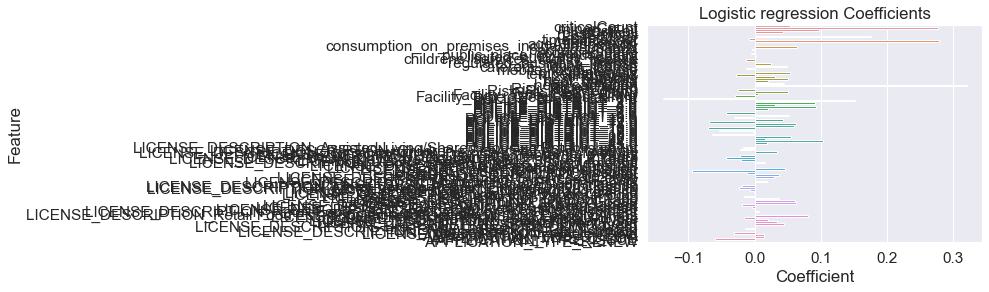

In [57]:
log_reg_data = pd.DataFrame([logit_best_pred_over[1], X_train_over.columns]).T
log_reg_data.columns= ['Coefficient', 'Feature']

# Plot
ax = sns.barplot(x="Coefficient", y="Feature", data=log_reg_data)
ax.set_title("Logistic regression Coefficients")
plt.show()

**Logistic Regression Confusion Matrix:**

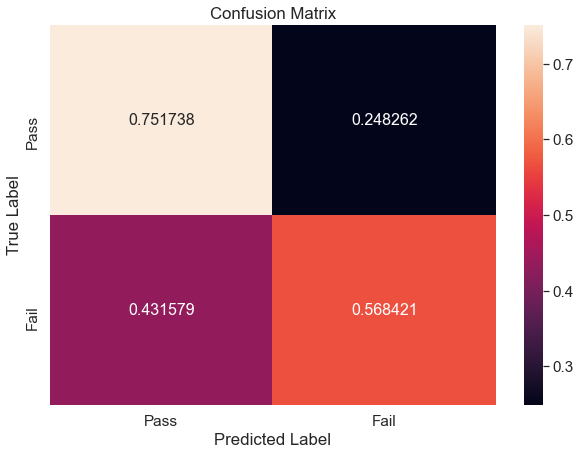

In [58]:
cf_matrix = confusion_matrix(y_validate, logit_best_pred_over[0], normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Visualization: SVM (Monica)

### Visualization: Tree thing (Kelly)

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]

## 5. Discussion

5.1 Why do we need metrics beyond accuracy when us- ing machine learning in the social sciences and public policy?  
  


5.2 Imagine that establishments learned about the algo- rithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were im- portant for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?